# WeatherPy
----

### Analysis
* As expected, we can clearly see that as we tend to move near the equator the temperature becomes really hot. And this time northern hemisphere looks little more hot than southern.
* We don't see any strong relationship between latitude and humidity and latitude and cloudiness. Humidity and Cloudiness is everywhere if we are near the equator or going away from it.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there are some cities with over 20 mph of wind.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv
import time
import openweathermapy.core as owm

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        

city_data = pd.DataFrame({"City": cities, "Country": countries})
city_data.head()

city_data["Cloudiness"] = ""
city_data["Date"] = ""
city_data["Humidity"] = ""
city_data["Lat"] = ""
city_data["Lng"] = ""
city_data["Max Temp"] = ""
city_data["Wind Speed"] = ""

city_data.head()

# Print the city count to confirm sufficient count
len(city_data)


636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Openweather URL and API key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
api_key = "7877738b651f6172dfb2597fe3669dab"
row_count = 0

#loop through city row to perform API calls
print("*************************")
print("BEGINNING DATA RETRIEVAL")
print("*************************")
for index, row in city_data.iterrows():
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + (row['City'])
    response = requests.get(query_url).json()
    print("-------------------------------")
    print(f"Processing City#: {row_count + 1} | {row['City']}")
    print(f"This is the requested URL: {query_url}")
    row_count += 1
    
    try:
        city_data.set_value(index, "Cloudiness", response["clouds"]["all"])
        city_data.set_value(index, "Date", response["dt"])
        city_data.set_value(index, "Humidity", response["main"]["humidity"])
        city_data.set_value(index, "Lat", response["coord"]["lat"])
        city_data.set_value(index, "Lng", response["coord"]["lon"])
        city_data.set_value(index, "Max Temp", response["main"]["temp_max"])
        city_data.set_value(index, "Wind Speed", response["wind"]["speed"])
    except:
        print("City not found. Skipping...")
     
    
    if row_count % 55 == 0:
        print("********************")
        print("PAUSE FOR 60 SECONDS")
        print("********************")
        time.sleep(60)
    
print("*************************")
print("DATA RETRIEVAL COMPLETE")
print("*************************")

*************************
BEGINNING DATA RETRIEVAL
*************************
-------------------------------
Processing City#: 1 | ushuaia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=ushuaia
-------------------------------
Processing City#: 2 | nome
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=nome


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

-------------------------------
Processing City#: 3 | hermanus
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=hermanus
-------------------------------
Processing City#: 4 | tuktoyaktuk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=tuktoyaktuk
-------------------------------
Processing City#: 5 | bur gabo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=bur gabo
City not found. Skipping...
-------------------------------
Processing City#: 6 | attawapiskat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=attawapiskat
City not found. Skipping...
-------------------------------
Processing City#: 7 | saleaula
This is the requested URL: http://api.openweathermap.org/da

-------------------------------
Processing City#: 44 | miami
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=miami
-------------------------------
Processing City#: 45 | fortuna
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=fortuna
-------------------------------
Processing City#: 46 | victoria
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=victoria
-------------------------------
Processing City#: 47 | illoqqortoormiut
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=illoqqortoormiut
City not found. Skipping...
-------------------------------
Processing City#: 48 | barra do garcas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7

-------------------------------
Processing City#: 84 | sri aman
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=sri aman
-------------------------------
Processing City#: 85 | faanui
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=faanui
-------------------------------
Processing City#: 86 | vao
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=vao
-------------------------------
Processing City#: 87 | barentsburg
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=barentsburg
City not found. Skipping...
-------------------------------
Processing City#: 88 | mergui
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3

-------------------------------
Processing City#: 123 | meinung
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=meinung
City not found. Skipping...
-------------------------------
Processing City#: 124 | caravelas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=caravelas
-------------------------------
Processing City#: 125 | port-gentil
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=port-gentil
-------------------------------
Processing City#: 126 | poum
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=poum
-------------------------------
Processing City#: 127 | pevek
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172

-------------------------------
Processing City#: 164 | ahuimanu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=ahuimanu
-------------------------------
Processing City#: 165 | berbera
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=berbera
City not found. Skipping...
********************
PAUSE FOR 60 SECONDS
********************
-------------------------------
Processing City#: 166 | okhotsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=okhotsk
-------------------------------
Processing City#: 167 | torbay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=torbay
-------------------------------
Processing City#: 168 | castro
This is the requested URL: http://api.

-------------------------------
Processing City#: 205 | podor
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=podor
-------------------------------
Processing City#: 206 | katobu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=katobu
-------------------------------
Processing City#: 207 | yulara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=yulara
-------------------------------
Processing City#: 208 | bubaque
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=bubaque
-------------------------------
Processing City#: 209 | harper
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=harper


-------------------------------
Processing City#: 246 | marv dasht
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=marv dasht
City not found. Skipping...
-------------------------------
Processing City#: 247 | tasbuget
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=tasbuget
City not found. Skipping...
-------------------------------
Processing City#: 248 | methoni
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=methoni
-------------------------------
Processing City#: 249 | saint george
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=saint george
-------------------------------
Processing City#: 250 | san patricio
This is the requested URL: http://api.openweather

-------------------------------
Processing City#: 286 | samana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=samana
-------------------------------
Processing City#: 287 | muros
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=muros
-------------------------------
Processing City#: 288 | bojnurd
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=bojnurd
-------------------------------
Processing City#: 289 | husavik
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=husavik
-------------------------------
Processing City#: 290 | oksfjord
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=oks

-------------------------------
Processing City#: 326 | chakrata
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=chakrata
-------------------------------
Processing City#: 327 | avera
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=avera
-------------------------------
Processing City#: 328 | khatanga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=khatanga
-------------------------------
Processing City#: 329 | north platte
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=north platte
-------------------------------
Processing City#: 330 | kuche
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=I

-------------------------------
Processing City#: 367 | namikupa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=namikupa
-------------------------------
Processing City#: 368 | goderich
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=goderich
-------------------------------
Processing City#: 369 | bowen
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=bowen
-------------------------------
Processing City#: 370 | shestakovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=shestakovo
-------------------------------
Processing City#: 371 | seoul
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imper

-------------------------------
Processing City#: 408 | tucurui
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=tucurui
-------------------------------
Processing City#: 409 | pilar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=pilar
-------------------------------
Processing City#: 410 | dabat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=dabat
-------------------------------
Processing City#: 411 | sistranda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=sistranda
-------------------------------
Processing City#: 412 | mtambile
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=m

-------------------------------
Processing City#: 448 | hanstholm
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=hanstholm
-------------------------------
Processing City#: 449 | kirakira
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=kirakira
-------------------------------
Processing City#: 450 | sibolga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=sibolga
-------------------------------
Processing City#: 451 | valleyview
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=valleyview
-------------------------------
Processing City#: 452 | burkhala
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&un

-------------------------------
Processing City#: 489 | saint-pierre
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=saint-pierre
-------------------------------
Processing City#: 490 | narsaq
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=narsaq
-------------------------------
Processing City#: 491 | sete lagoas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=sete lagoas
-------------------------------
Processing City#: 492 | elliot
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=elliot
-------------------------------
Processing City#: 493 | fukue
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&uni

-------------------------------
Processing City#: 529 | jackson
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=jackson
-------------------------------
Processing City#: 530 | thies
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=thies
-------------------------------
Processing City#: 531 | tamworth
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=tamworth
-------------------------------
Processing City#: 532 | kahului
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=kahului
-------------------------------
Processing City#: 533 | gayeri
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=g

-------------------------------
Processing City#: 569 | kotido
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=kotido
-------------------------------
Processing City#: 570 | lar gerd
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=lar gerd
City not found. Skipping...
-------------------------------
Processing City#: 571 | deder
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=deder
-------------------------------
Processing City#: 572 | lowestoft
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=lowestoft
-------------------------------
Processing City#: 573 | conway
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb25

-------------------------------
Processing City#: 610 | rochegda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=rochegda
-------------------------------
Processing City#: 611 | yarada
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=yarada
-------------------------------
Processing City#: 612 | rawannawi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=rawannawi
City not found. Skipping...
-------------------------------
Processing City#: 613 | ocos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=ocos
-------------------------------
Processing City#: 614 | millington
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data.head(15)

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,ar,90,1537621200,83,-54.81,-68.31,33.8,11.41
1,nome,us,90,1537622760,89,30.04,-94.42,79.7,6.93
2,hermanus,za,0,1537623511,39,-34.42,19.24,67.95,5.06
3,tuktoyaktuk,ca,75,1537621200,100,69.44,-133.03,32,8.05
4,bur gabo,so,,,,,,,
5,attawapiskat,ca,,,,,,,
6,saleaula,ws,,,,,,,
7,rikitea,pf,20,1537623511,100,-23.12,-134.97,70.47,10.2
8,esperance,au,40,1537621200,74,10.24,-61.45,86,10.29
9,coihaique,cl,90,1537621200,93,-45.58,-72.07,37.4,2.24


In [6]:
#delete empty rows
city_data = city_data.replace(r'', np.NaN)
city_data = city_data.dropna(how='any')
city_data.count()

City          571
Country       571
Cloudiness    571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [7]:
#export city data into CSV
city_data.to_csv("city_data.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

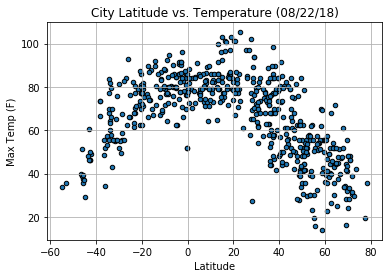

In [24]:
#create a plot
city_data.plot.scatter(["Lat"], ["Max Temp"], marker ='o', facecolors ="G", edgecolors="black", alpha = 1)

#Set the labels
plt.title("City Latitude vs. Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

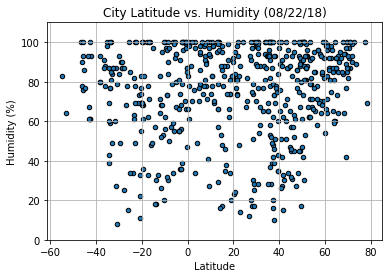

In [23]:
#create a plot
city_data.plot.scatter(["Lat"], ["Humidity"], marker ='o', facecolors ="blue", edgecolors="black", alpha = 1)
ax = plt.gca()
ax.set_ylim(0, 110)
#Set the labels
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

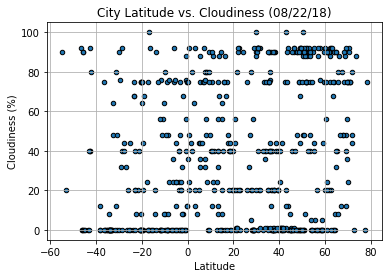

In [10]:
#create a plot
city_data.plot.scatter(["Lat"], ["Cloudiness"], marker ='o', facecolors ="blue", edgecolors="black", alpha = 1)

#Set the labels
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

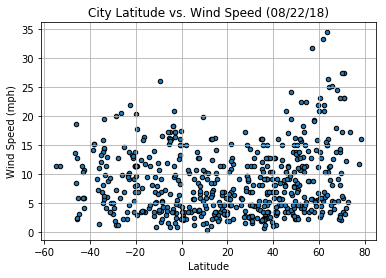

In [11]:
#create a plot
city_data.plot.scatter(["Lat"], ["Wind Speed"], marker ='o', facecolors ="blue", edgecolors="black", alpha = 1)

#Set the labels
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()